In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

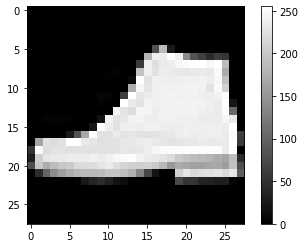

In [5]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_labels[data_idx]

9

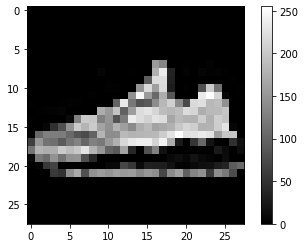

In [7]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
valid_labels[data_idx]

7

In [9]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

2022-03-23 15:14:13.737628: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-23 15:14:13.738016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 15:14:13.738385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 15:14:13.738639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

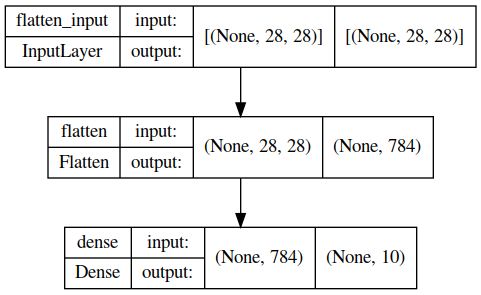

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5


2022-03-23 15:15:06.574880: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


  61/1875 [..............................] - ETA: 1s - loss: 57.4703 - accuracy: 0.4559        

2022-03-23 15:15:07.619579: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 3s 1ms/step - loss: 16.5811 - accuracy: 0.7465 - val_loss: 18.7258 - val_accuracy: 0.7352
Epoch 2/5
1875/1875 [==============================] - 2s 931us/step - loss: 12.1105 - accuracy: 0.7875 - val_loss: 10.8543 - val_accuracy: 0.7858
Epoch 3/5
1875/1875 [==============================] - 2s 889us/step - loss: 11.4033 - accuracy: 0.7922 - val_loss: 22.3968 - val_accuracy: 0.6855
Epoch 4/5
1875/1875 [==============================] - 2s 920us/step - loss: 10.8565 - accuracy: 0.8007 - val_loss: 11.8651 - val_accuracy: 0.8032
Epoch 5/5
1875/1875 [==============================] - 2s 938us/step - loss: 10.4972 - accuracy: 0.8032 - val_loss: 10.7182 - val_accuracy: 0.8063


In [19]:
model.predict(train_images[0:10])

array([[ -317.55206 ,  -567.14435 ,  -130.82487 ,  -461.61523 ,
         -188.91324 ,   514.0943  ,   -71.00929 ,   305.81058 ,
          132.4701  ,   733.99915 ],
       [  566.62463 ,   -89.864   ,   325.82617 ,   161.89705 ,
          104.343414, -1042.1361  ,   371.6535  , -1516.3733  ,
           31.577808,  -720.6733  ],
       [  139.47667 ,   122.90648 ,    93.39969 ,   121.53538 ,
           97.481606,  -409.02902 ,   106.298035,  -418.6275  ,
          -21.691856,  -177.26389 ],
       [  244.6581  ,    90.79705 ,   175.47755 ,   206.50539 ,
          115.5581  ,  -650.46246 ,   221.99214 ,  -824.8287  ,
          -28.615158,  -571.8413  ],
       [  267.7574  ,   291.59314 ,   171.4583  ,   291.03217 ,
          277.66733 ,  -799.1612  ,   214.02678 ,  -614.02936 ,
           98.3953  ,  -527.1248  ],
       [  298.74786 ,    87.801674,   400.1225  ,   158.6433  ,
          325.07346 ,  -692.70374 ,   274.51324 , -1344.9517  ,
          126.93917 ,  -779.98114 ],
       [ -

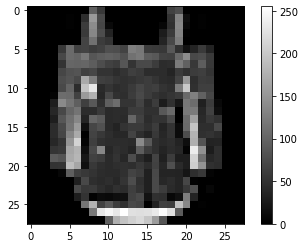

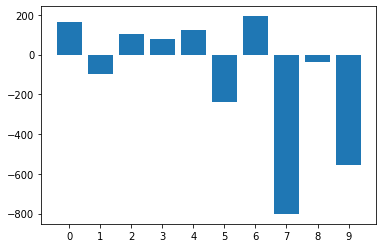

correct answer: 6


In [20]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])